In [1]:
import os
if os.getcwd().endswith("experiments"):
    os.chdir("..")

os.getcwd()

'/home/lars/code/python/context-aware-flow-matching'

In [2]:
import torch
from torch.utils.data import random_split

import matplotlib.pyplot as plt

from lightning import seed_everything

from lightning_trainable.utils import find_checkpoint

from src.datasets import ContextAwareFlowMatchingDataset as CAFMDataset, ModelNet10Dataset
from src.models import Model
import src.visualization as viz

In [3]:
torch.autograd.set_grad_enabled(False)

In [4]:
seed_everything(42)

Seed set to 42


42

In [5]:
dataset = ModelNet10Dataset("data/modelnet10", shapes=["chair"])

Found non-empty ModelNet10Dataset in data/modelnet10, skipping download...


Pre-Loading Meshes: 100%|██████████| 989/989 [00:14<00:00, 68.22it/s] 


In [6]:
train_data, val_data, test_data = random_split(dataset, [0.8, 0.1, 0.1])

In [7]:
cp = find_checkpoint(version=1)
model = Model.load_from_checkpoint(cp, map_location="cpu")
model.train_data = CAFMDataset(train_data, model.hparams.subset_size)
model.val_data = CAFMDataset(val_data, model.hparams.subset_size)
model.test_data = CAFMDataset(test_data, model.hparams.subset_size)
model = model.eval()
cp

'lightning_logs/version_1/checkpoints/last.ckpt'

In [8]:
shapes = 18
layout = (3, 6)
points = 2048

use_blender = False

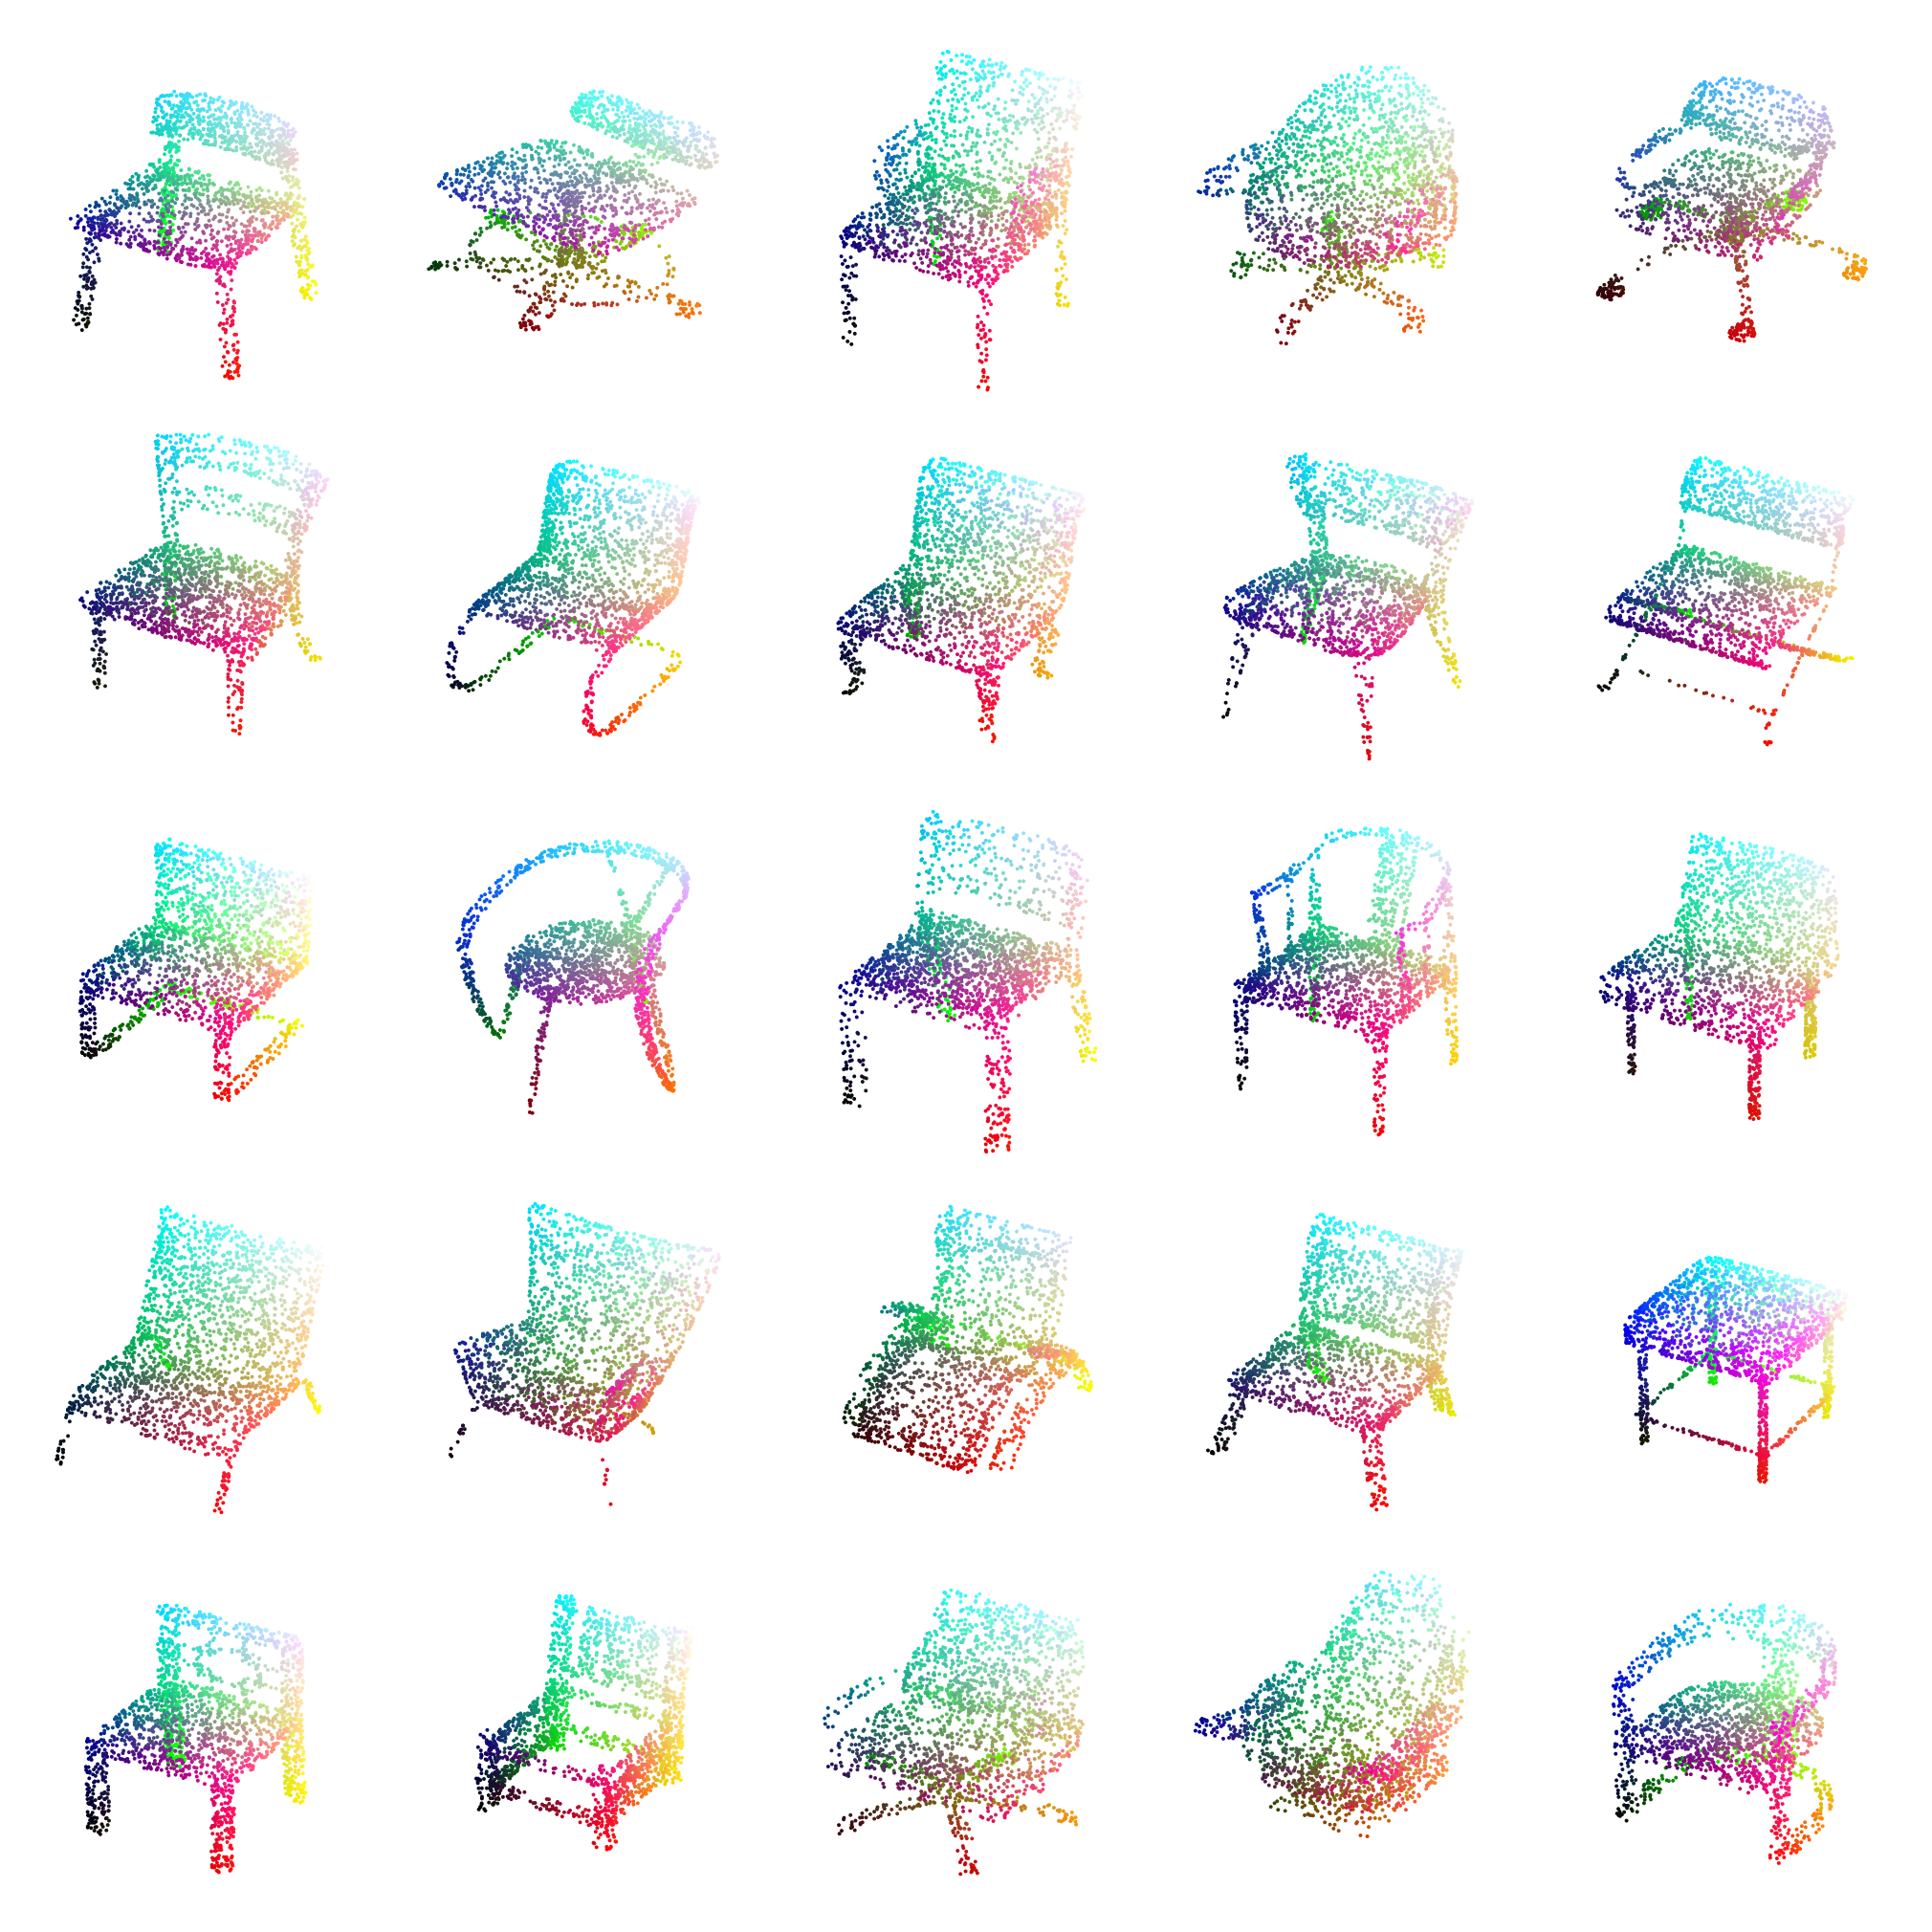

In [9]:
data_samples = torch.stack([model.val_data[i][1] for i in torch.randperm(len(model.val_data))[:shapes]])

if use_blender:
    viz.multiscatter_bp(data_samples.cpu().numpy(), layout=layout)
else:
    viz.multiscatter(data_samples.cpu().numpy(), layout=layout)

plt.savefig("figures/data_samples.png", dpi=100, bbox_inches="tight")

100%|██████████| 100/100 [09:27<00:00,  5.67s/it]


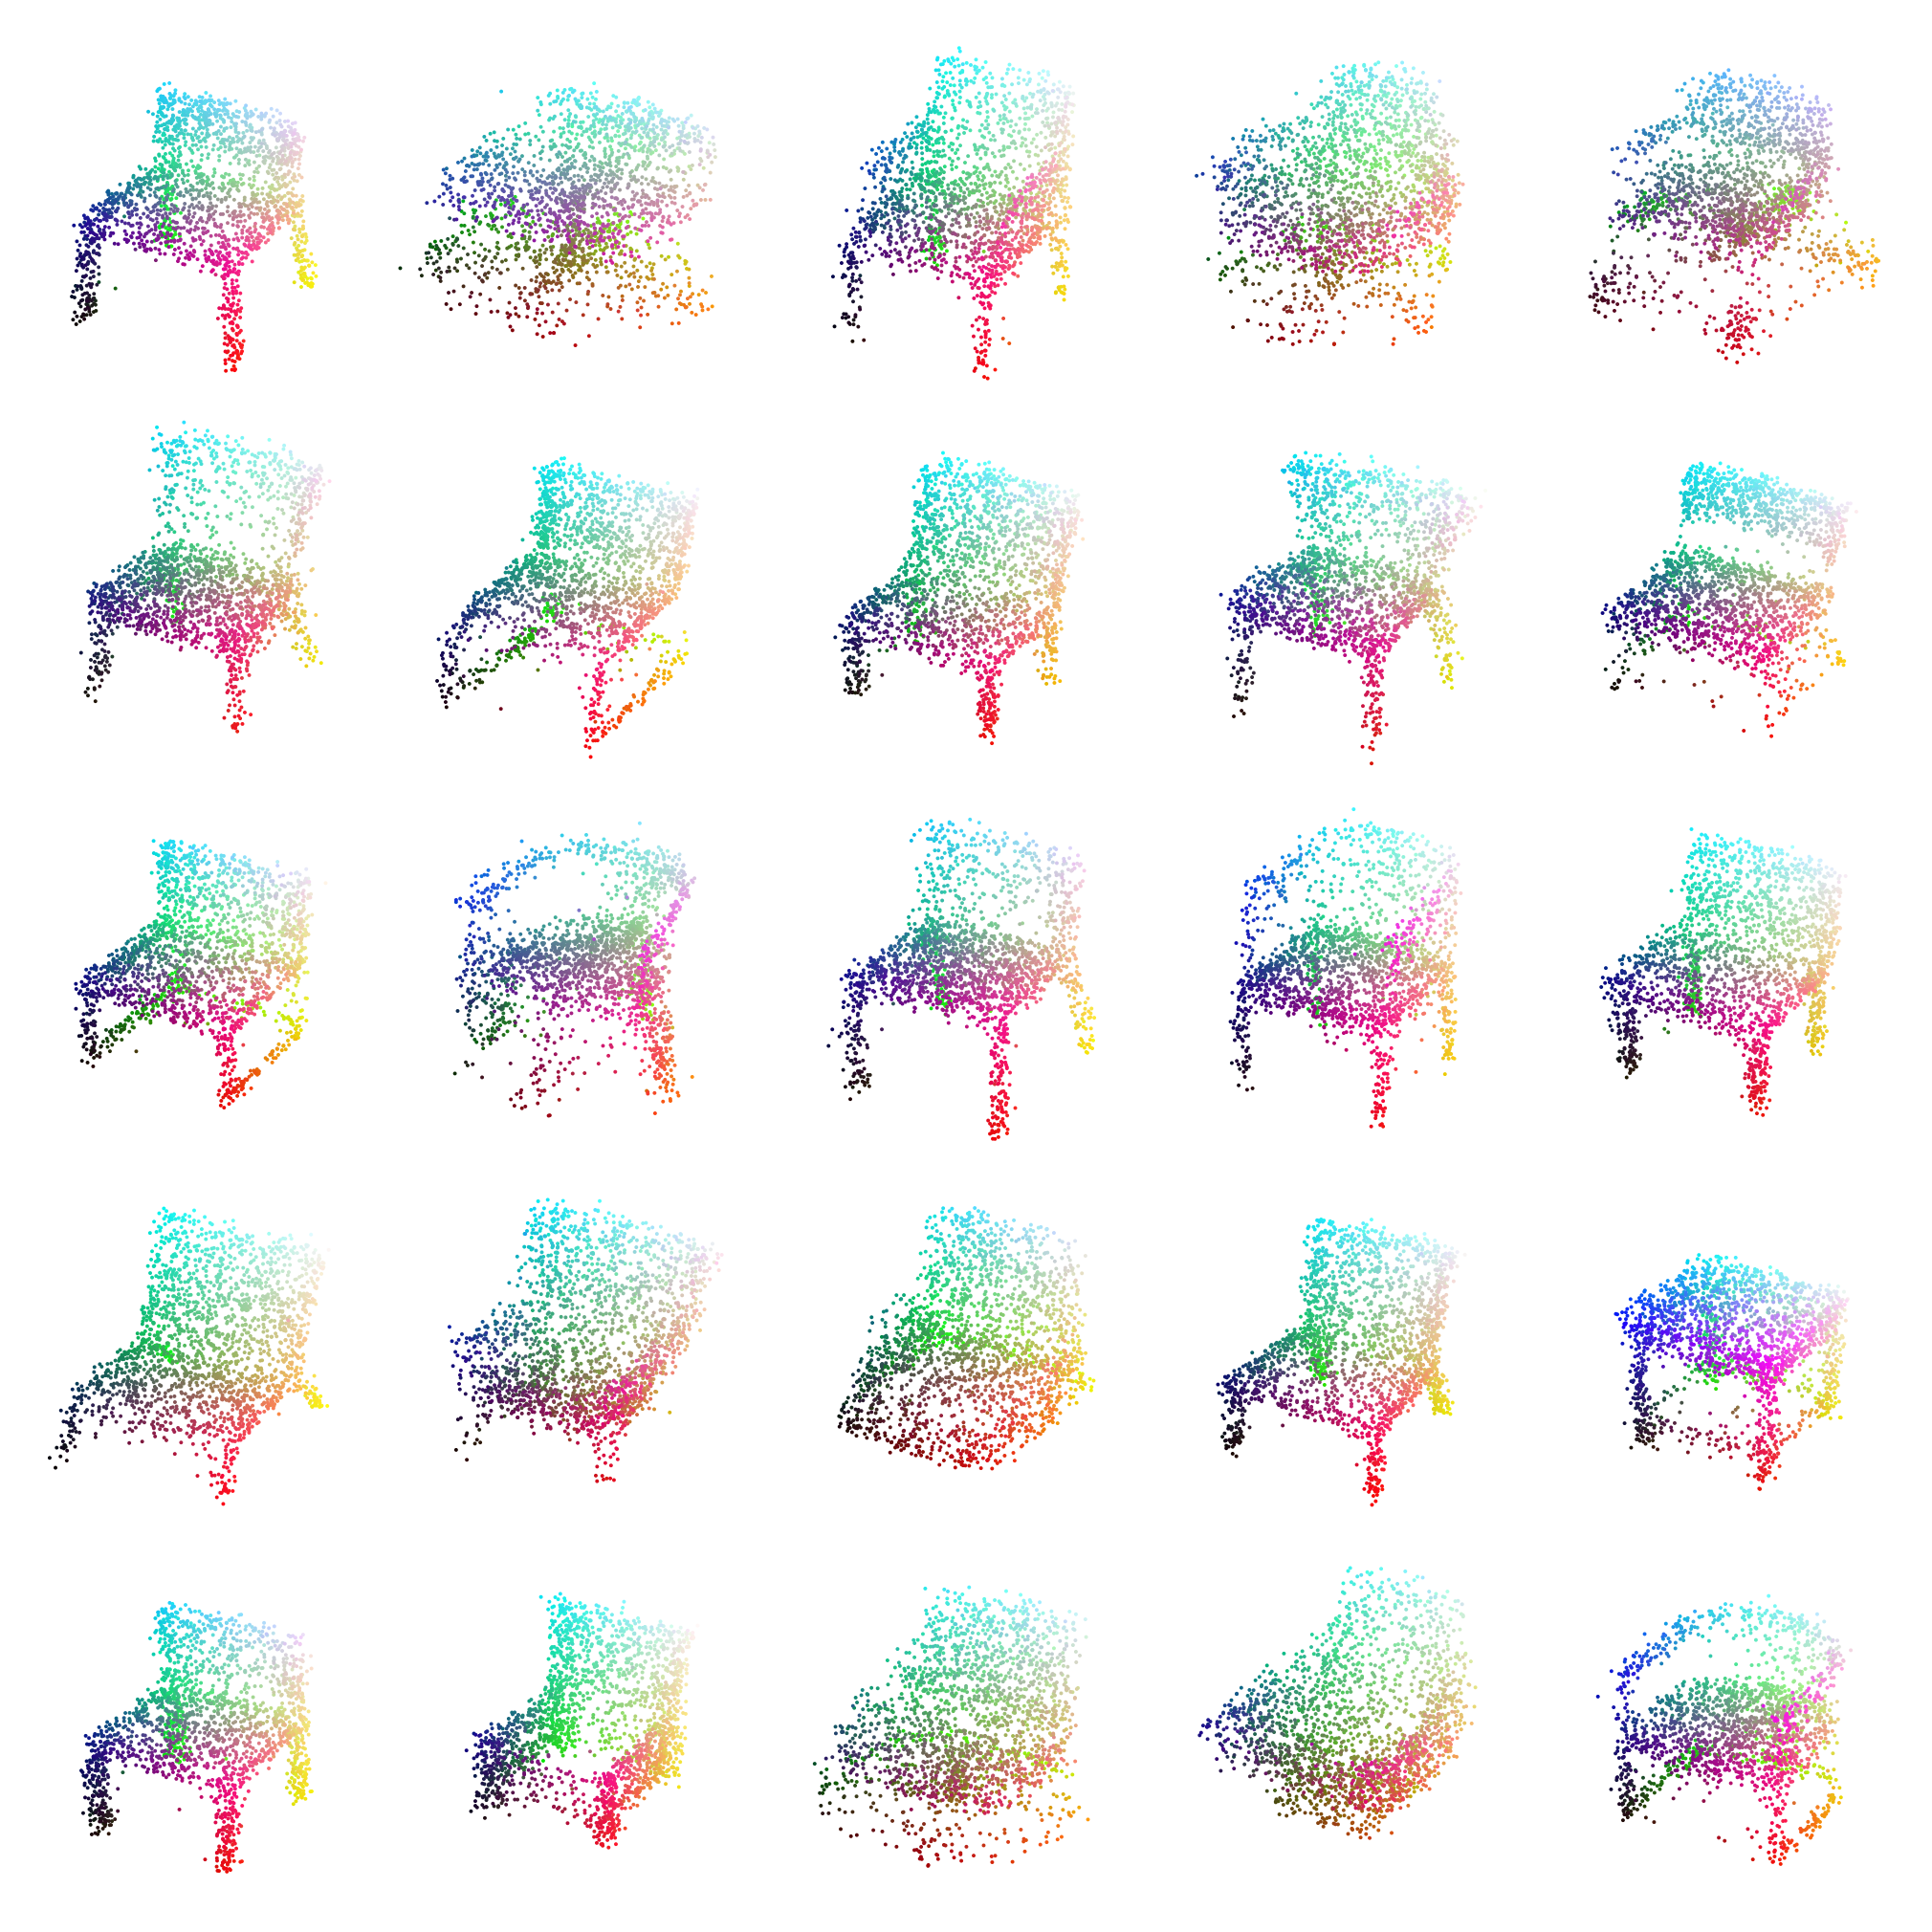

In [10]:
model_samples = model.reconstruct(data_samples.to(model.device), steps=250, progress=True)

if use_blender:
    viz.multiscatter_bp(model_samples.cpu().numpy(), layout=layout)
else:
    viz.multiscatter(model_samples.cpu().numpy(), layout=layout)

plt.savefig("figures/reconstructions.png", dpi=100, bbox_inches="tight")